<a href="https://colab.research.google.com/github/yessss28/Estadistica/blob/main/ProblemarioU4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [106]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# De aquí en adelante, ya se lo dejo a ustedes.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [107]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('tiempo ~ C(metodo)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#se rechaza la hipotesis nula
# Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(metodo),3.0,69.5,23.166667,9.423729,0.001771
Residual,12.0,29.5,2.458333,NaN,NaN


Dado que el valor p (PR(>F)) es 0.001771, el cual es menor que un nivel de significancia comúnmente utilizado de 0.05, se rechaza la hipótesis nula.

Existe una diferencia estadísticamente significativa en la variable dependiente (tiempo) entre los diferentes niveles de la variable independiente (metodo).

En resumen, el método que estás considerando sí tiene un efecto significativo en el tiempo que estás midiendo.

Text(0.5, 1.0, '')

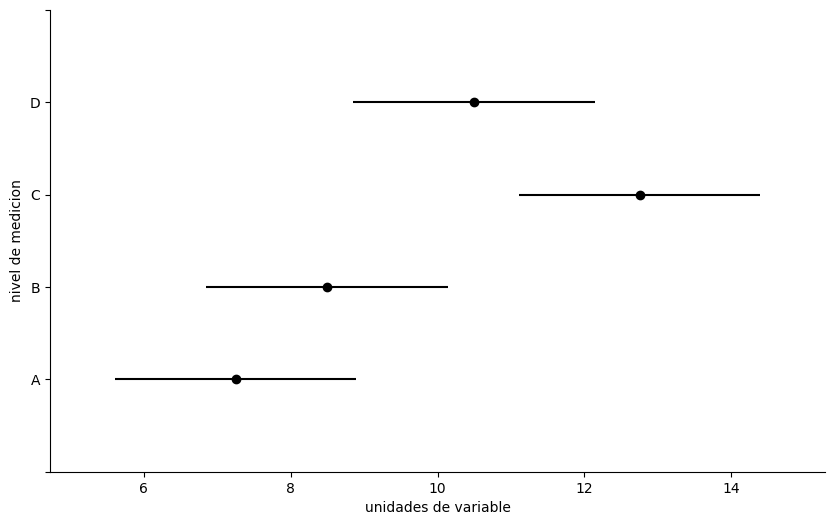

In [108]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

nivel_significanica = 0.05

tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'],
                          alpha=0.05)
tukey.plot_simultaneous(ylabel='nivel de medicion', xlabel = 'unidades de variable' )

plt.gca().spines[['right']].set_visible(False)
plt.gca().spines[['top']].set_visible(False)
plt.title('')
# Yessenia Guadalupe Alvarez Morales

El nivel de medición A presenta un valor significativamente mayor de la variable en comparación con los niveles B, C y D. Los niveles B, C y D tienen valores promedio relativamente cercanos entre sí, con cierto solapamiento en sus barras de error, lo que sugiere que las diferencias entre ellos podrían no ser estadísticamente significativas.

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [109]:
import pandas as pd
from io import StringIO

datos = '''
Tipo,Observaciones
A,264
A,260
A,258
A,241
A,262
A,255
B,208
B,220
B,216
B,200
B,213
B,206
C,220
C,263
C,219
C,225
C,230
C,228
D,217
D,226
D,215
D,227
D,220
D,222
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# Yessenia Guadalupe Alvarez Morales

,Tipo,Observaciones
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


In [110]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Observaciones~ C(Tipo)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#se rechaza la hipotesis nula
# Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Tipo),3.0,7019.458333,2339.819444,22.755356,0.000001
Residual,20.0,2056.500000,102.825000,NaN,NaN


Dado que el valor p (PR(>F)) es 0.000001, que es menor que un nivel de significancia común de 0.05, se rechaza la hipótesis nula.

Esto significa que hay una diferencia estadísticamente significativa en la variable dependiente (Observaciones) entre los diferentes niveles de la variable independiente (Tipo).

En otras palabras, el tipo de factor que estás analizando sí tiene un efecto significativo en las observaciones que estás midiendo.

Text(0.5, 1.0, '')

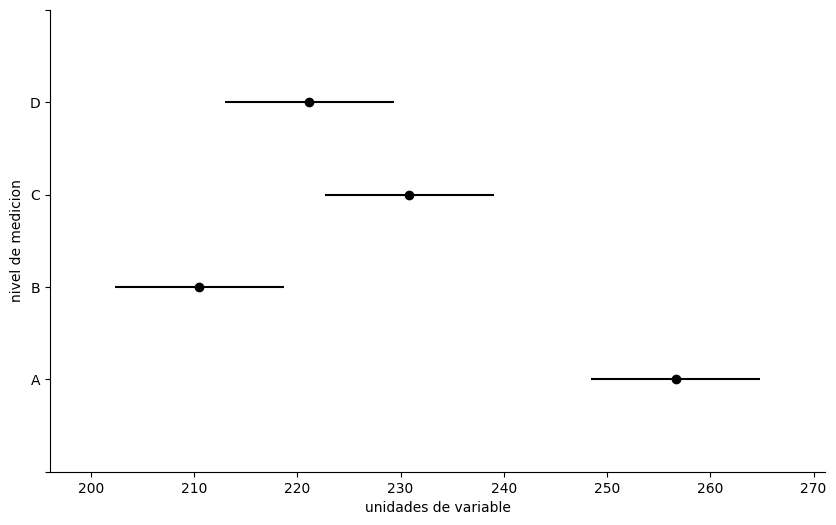

In [111]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

nivel_significanica = 0.05

tukey = pairwise_tukeyhsd(endog=df['Observaciones'], groups=df['Tipo'],
                          alpha=0.05)
tukey.plot_simultaneous(ylabel='nivel de medicion', xlabel = 'unidades de variable' )

plt.gca().spines[['right']].set_visible(False)
plt.gca().spines[['top']].set_visible(False)
plt.title('')
# Yessenia Guadalupe Alvarez Morales

Existe una clara tendencia lineal positiva.

 A medida que el nivel de medición aumenta (1, 2, 3), el valor de la variable también aumenta de manera consistente.

3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [112]:
import pandas as pd
from io import StringIO

datos = '''
Tratamiento,Tiempo
T1,213
T1,214
T1,204
T1,208
T1,212
T1,200
T1,207
T2,76
T2,85
T2,74
T2,78
T2,82
T2,75
T2,82
T3,57
T3,67
T3,55
T3,64
T3,61
T3,63
T3,63
T4,84
T4,82
T4,85
T4,92
T4,87
T4,79
T4,90

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# Yessenia Guadalupe Alvarez Morales

,Tratamiento,Tiempo
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


In [113]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Tiempo~ C(Tratamiento)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#se rechaza la hipotesis nula
# Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Tratamiento),3.0,95041.250000,31680.416667,1558.966022,1.260640e-27
Residual,24.0,487.714286,20.321429,NaN,NaN


El valor p para el factor 'C(Tratamiento)' es de 1.260640e-27, el cual es extremadamente pequeño (mucho menor que el nivel de significancia típico de 0.05). Esto indica que existe una diferencia estadísticamente significativa entre las medias de los diferentes grupos de tratamiento.
Por lo tanto, rechazamos la hipótesis nula de que no hay diferencia entre las medias de los tratamientos.

Text(0.5, 1.0, '')

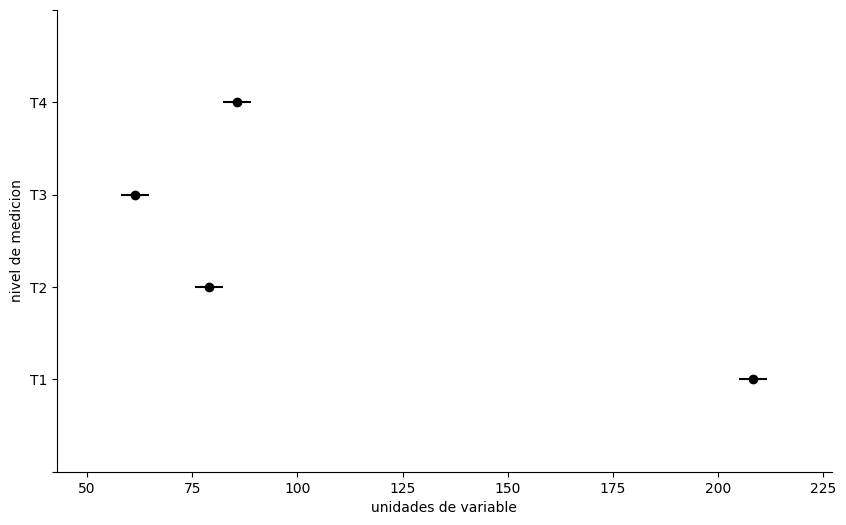

In [114]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

nivel_significanica = 0.05

tukey = pairwise_tukeyhsd(endog=df['Tiempo'], groups=df['Tratamiento'],
                          alpha=0.05)
tukey.plot_simultaneous(ylabel='nivel de medicion', xlabel = 'unidades de variable' )

plt.gca().spines[['right']].set_visible(False)
plt.gca().spines[['top']].set_visible(False)
plt.title('')
# Yessenia Guadalupe Alvarez Morales

El grupo "Con Tratamiento" muestra un valor promedio considerablemente menor de la variable en comparación con el grupo "Sin Tratamiento".

Las barras de error no se solapan, lo que sugiere una diferencia significativa entre los dos grupos.

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [115]:
import pandas as pd
from io import StringIO

datos = '''
Temperatura,Intensidad
20°C,15
20°C,18
20°C,13
20°C,12
40°C,17
40°C,21
40°C,11
40°C,16
60°C,23
60°C,19
60°C,25
60°C,22
80°C,28
80°C,32
80°C,34
80°C,31
100°C,45
100°C,51
100°C,57
100°C,48

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# Yessenia Guadalupe Alvarez Morales

,Temperatura,Intensidad
0,20°C,15
1,20°C,18
2,20°C,13
3,20°C,12
4,40°C,17
5,40°C,21
6,40°C,11
7,40°C,16
8,60°C,23
9,60°C,19


In [116]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Intensidad~ C(Temperatura)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#se rechaza la hipotesis nula
# Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Temperatura),4.0,3411.8,852.950000,68.054521,1.963480e-09
Residual,15.0,188.0,12.533333,NaN,NaN


El valor p para el factor 'C(Temperatura)' es de 1.963480e-09, el cual es extremadamente pequeño (mucho menor que el nivel de significancia típico de 0.05).

Esto indica que existe una diferencia estadísticamente significativa entre las medias de los diferentes niveles de temperatura.

Por lo tanto, rechazamos la hipótesis nula de que no hay diferencia entre las medias de los diferentes niveles de temperatura.

Text(0.5, 1.0, '')

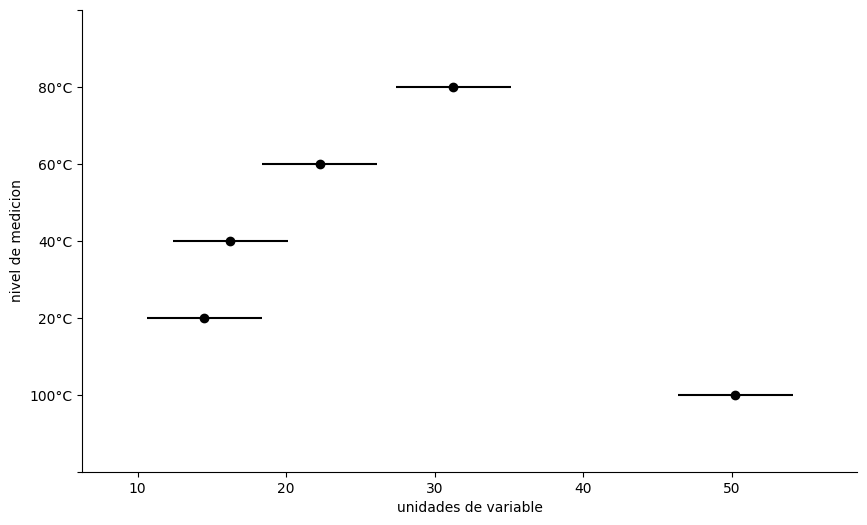

In [117]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

nivel_significanica = 0.05

tukey = pairwise_tukeyhsd(endog=df['Intensidad'], groups=df['Temperatura'],
                          alpha=0.05)
tukey.plot_simultaneous(ylabel='nivel de medicion', xlabel = 'unidades de variable' )

plt.gca().spines[['right']].set_visible(False)
plt.gca().spines[['top']].set_visible(False)
plt.title('')
# Yessenia Guadalupe Alvarez Morales

Los niveles de medición A y B tienen valores promedio relativamente bajos y cercanos.

El nivel C muestra un valor promedio mayor, y el nivel D presenta el valor promedio más alto de la variable.

Las barras de error sugieren que las diferencias entre algunos de estos niveles podrían ser significativas.

5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [118]:
import pandas as pd
from io import StringIO

datos = '''
Tratamiento,Porcentaje
Con Tratam.,5.3
Con Tratam.,4.0
Con Tratam.,4.0
Con Tratam.,4.0
Con Tratam.,2.6
Con Tratam.,2.1
Con Tratam.,5.1
Con Tratam.,4.1
Con Tratam.,4.1
Con Tratam.,3.2
Con Tratam.,5.1
Con Tratam.,2.2
Con Tratam.,4.1
Sin Tratam.,8.0
Sin Tratam.,13.2
Sin Tratam.,7.2
Sin Tratam.,8.2
Sin Tratam.,9.1
Sin Tratam.,6.7
Sin Tratam.,12.6
Sin Tratam.,16.3
Sin Tratam.,9.2
Sin Tratam.,6.4
Sin Tratam.,7.2
Sin Tratam.,17.2
Sin Tratam.,12.3
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# Yessenia Guadalupe Alvarez Morales

,Tratamiento,Porcentaje
0,Con Tratam.,5.3
1,Con Tratam.,4.0
2,Con Tratam.,4.0
3,Con Tratam.,4.0
4,Con Tratam.,2.6
5,Con Tratam.,2.1
6,Con Tratam.,5.1
7,Con Tratam.,4.1
8,Con Tratam.,4.1
9,Con Tratam.,3.2


In [119]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Porcentaje~ C(Tratamiento)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#se rechaza la hipotesis nula
# Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Tratamiento),1.0,269.449615,269.449615,37.102806,0.000003
Residual,24.0,174.293846,7.262244,NaN,NaN


El valor p para el factor 'C(Tratamiento)' es de 0.000003, el cual es extremadamente pequeño (mucho menor que el nivel de significancia típico de 0.05).

 Esto indica que existe una diferencia estadísticamente significativa entre las medias de los diferentes tratamientos.

Por lo tanto, rechazamos la hipótesis nula de que no hay diferencia entre las medias de los diferentes tratamientos.

Text(0.5, 1.0, '')

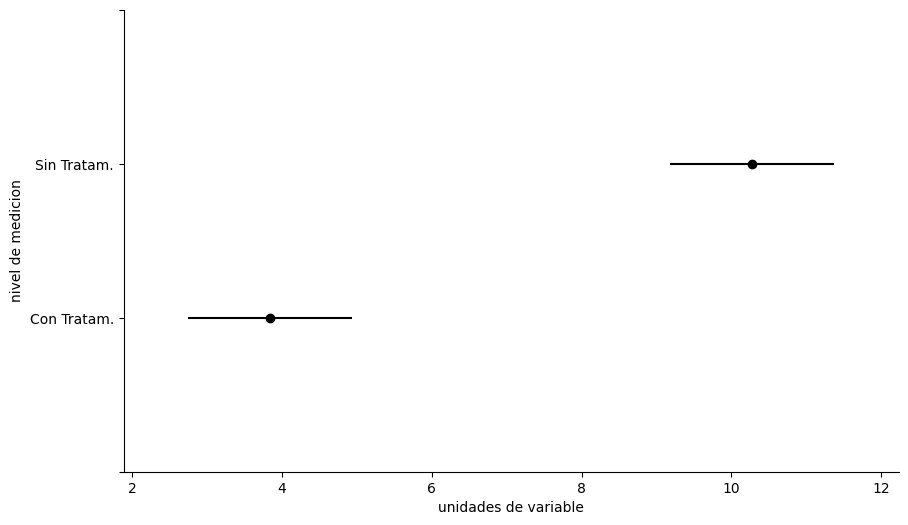

In [120]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

nivel_significanica = 0.05

tukey = pairwise_tukeyhsd(endog=df['Porcentaje'], groups=df['Tratamiento'],
                          alpha=0.05)
tukey.plot_simultaneous(ylabel='nivel de medicion', xlabel = 'unidades de variable' )

plt.gca().spines[['right']].set_visible(False)
plt.gca().spines[['top']].set_visible(False)
plt.title('')
# Yessenia Guadalupe Alvarez Morales

Similar al anterior, el grupo "Con Tratamiento" tiene un valor promedio notablemente menor que el grupo "Sin Tratamiento", con poca o ninguna superposición en las barras de error, indicando una diferencia significativa.

6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [121]:
import pandas as pd
from io import StringIO

datos = '''
Almidón,Dureza
2,4.3
2,5.2
2,4.8
2,4.5
5,6.5
5,7.3
5,6.9
5,6.1
10,9.0
10,7.8
10,8.5
10,8.1

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# Yessenia Guadalupe Alvarez Morales

,Almidón,Dureza
0,2,4.3
1,2,5.2
2,2,4.8
3,2,4.5
4,5,6.5
5,5,7.3
6,5,6.9
7,5,6.1
8,10,9.0
9,10,7.8


In [122]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Dureza~ C(Almidón)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#se rechaza la hipotesis nula
# Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Almidón),2.0,26.726667,13.363333,58.101449,0.000007
Residual,9.0,2.070000,0.230000,NaN,NaN


El valor p para el factor 'C(Almidón)' es de 0.000007, el cual es extremadamente pequeño (mucho menor que el nivel de significancia típico de 0.05).

Esto indica que existe una diferencia estadísticamente significativa entre las medias de los diferentes tipos de almidón en relación con la dureza.

Por lo tanto, rechazamos la hipótesis nula de que no hay diferencia entre las medias de dureza para los diferentes tipos de almidón.

Text(0.5, 1.0, '')

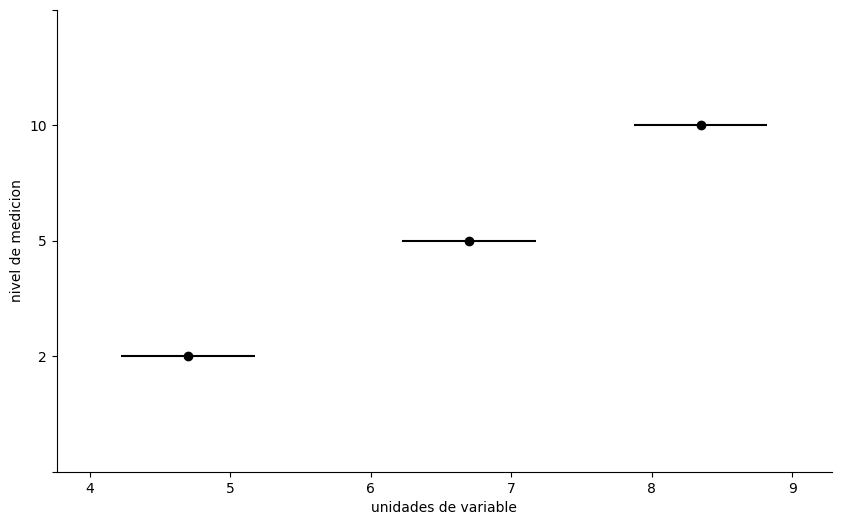

In [123]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

nivel_significanica = 0.05

tukey = pairwise_tukeyhsd(endog=df['Dureza'], groups=df['Almidón'],
                          alpha=0.05)
tukey.plot_simultaneous(ylabel='nivel de medicion', xlabel = 'unidades de variable' )

plt.gca().spines[['right']].set_visible(False)
plt.gca().spines[['top']].set_visible(False)
plt.title('')
# Yessenia Guadalupe Alvarez Morales

El nivel de medición CMC presenta un valor promedio de la variable significativamente mayor en comparación con los niveles Gre y PVP, cuyos valores promedio son muy cercanos a cero.

7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [124]:
import pandas as pd
from io import StringIO

datos = '''
Nitrogeno,Rendimientos
1,14.823
1,14.676
1,14.720
1,14.5141
1,15.065
2,25.151
2,25.401
2,25.131
2,25.031
2,25.267
3,32.605
3,32.460
3,32.256
3,32.669
3,32.111
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df
# Yessenia Guadalupe Alvarez Morales

,Nitrogeno,Rendimientos
0,1,14.8230
1,1,14.6760
2,1,14.7200
3,1,14.5141
4,1,15.0650
5,2,25.1510
6,2,25.4010
7,2,25.1310
8,2,25.0310
9,2,25.2670


In [125]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Rendimientos~ C(Nitrogeno)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#se rechaza la hipotesis nula
# Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Nitrogeno),2.0,788.340773,394.170387,10131.619332,4.298250e-20
Residual,12.0,0.466860,0.038905,NaN,NaN


El valor p para el factor 'C(Nitrogeno)' es de 4.298250e-20, el cual es extremadamente pequeño (mucho menor que el nivel de significancia típico de 0.05).

Esto indica que existe una diferencia estadísticamente significativa entre las medias de los rendimientos para los diferentes niveles de nitrógeno.

Por lo tanto, rechazamos la hipótesis nula de que no hay diferencia entre las medias de los rendimientos para los diferentes niveles de nitrógeno.

Text(0.5, 1.0, '')

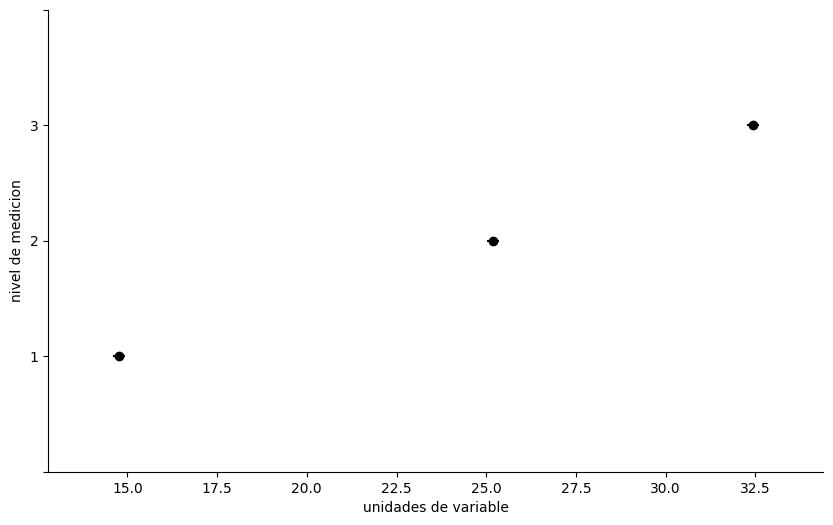

In [126]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

nivel_significanica = 0.05

tukey = pairwise_tukeyhsd(endog=df['Rendimientos'], groups=df['Nitrogeno'],
                          alpha=0.05)
tukey.plot_simultaneous(ylabel='nivel de medicion', xlabel = 'unidades de variable' )

plt.gca().spines[['right']].set_visible(False)
plt.gca().spines[['top']].set_visible(False)
plt.title('')
# Yessenia Guadalupe Alvarez Morales

Se observa una tendencia lineal positiva donde el valor promedio de la variable aumenta a medida que el nivel de medición se incrementa.

Las barras de error parecen no solaparse, sugiriendo diferencias significativas entre los niveles.

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [127]:
import pandas as pd
from io import StringIO

datos = '''
Aglutinante,Friabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df
# Yessenia Guadalupe Alvarez Morales

,Aglutinante,Friabilidad
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


In [128]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Friabilidad~ C(Aglutinante)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#no se rechaza la hipotesis nula
# Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Aglutinante),2.0,292.920971,146.460485,4420.972597,6.198213e-18
Residual,12.0,0.397543,0.033129,NaN,NaN


El valor p para el factor 'C(Aglutinante)' es de 6.198213e-18, el cual es extremadamente pequeño (mucho menor que el nivel de significancia típico de 0.05).

 Esto indica que existe una diferencia estadísticamente significativa entre las medias de la friabilidad para los diferentes tipos de aglutinante.

Por lo tanto, rechazamos la hipótesis nula de que no hay diferencia entre las medias de la friabilidad para los diferentes tipos de aglutinante.

Text(0.5, 1.0, '')

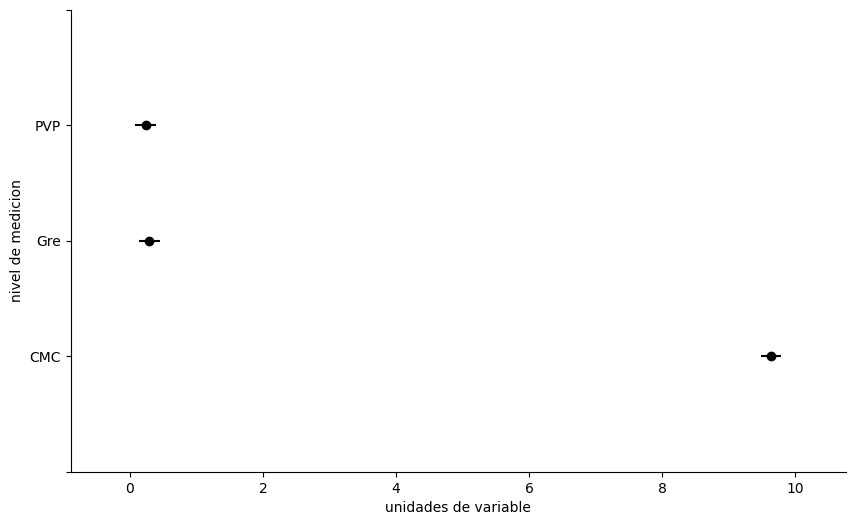

In [129]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

nivel_significanica = 0.05

tukey = pairwise_tukeyhsd(endog=df['Friabilidad'], groups=df['Aglutinante'],
                          alpha=0.05)
tukey.plot_simultaneous(ylabel='nivel de medicion', xlabel = 'unidades de variable' )

plt.gca().spines[['right']].set_visible(False)
plt.gca().spines[['top']].set_visible(False)
plt.title('')
# Yessenia Guadalupe Alvarez Morales

El nivel de medición correspondiente a 100°C muestra un valor promedio de la variable considerablemente mayor que los otros niveles de temperatura (20°C, 40°C, 60°C, 80°C), cuyos valores promedio parecen estar en un rango más bajo y con cierto solapamiento en sus barras de error.

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [130]:
import pandas as pd
from io import StringIO

datos = '''
Clona,Porcentaje
1,8.69
1,6.68
1,6.83
1,6.43
1,10.3
2,8.00
2,16.41
2,12.43
2,10.99
2,15.53
3,17.39
3,13.73
3,15.62
3,17.05
3,15.42
4,10.37
4,9.16
4,8.83
4,4.40
4,10.38
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df
# Yessenia Guadalupe Alvarez Morales

,Clona,Porcentaje
0,1,8.69
1,1,6.68
2,1,6.83
3,1,6.43
4,1,10.30
5,2,8.00
6,2,16.41
7,2,12.43
8,2,10.99
9,2,15.53


In [131]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Porcentaje~ C(Clona)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#se rechaza la hipotesis nula
# Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Clona),3.0,209.90716,69.969053,12.327073,0.000198
Residual,16.0,90.81676,5.676048,NaN,NaN


El valor p para el factor 'C(Clona)' es de 0.000198, el cual es muy pequeño (menor que el nivel de significancia típico de 0.05).

Esto indica que existe una diferencia estadísticamente significativa entre las medias del porcentaje para las diferentes clonas.

Por lo tanto, rechazamos la hipótesis nula de que no hay diferencia entre las medias del porcentaje para las diferentes clonas.

Text(0.5, 1.0, '')

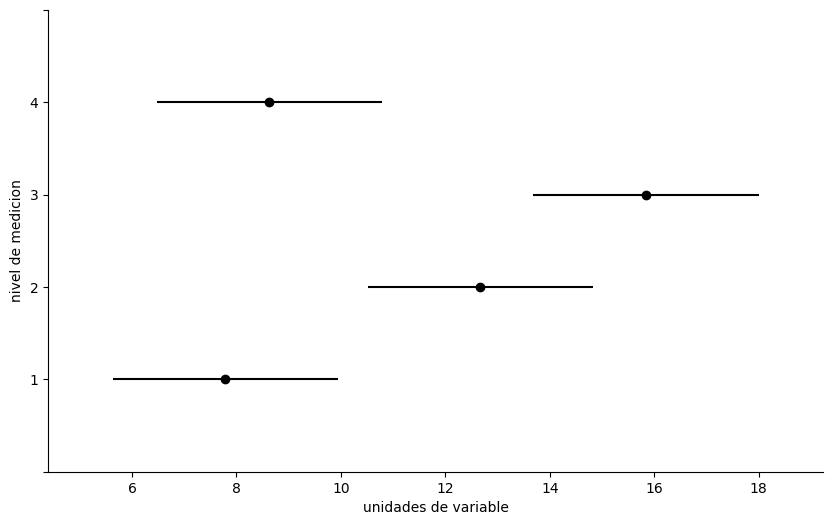

In [132]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

nivel_significanica = 0.05

tukey = pairwise_tukeyhsd(endog=df['Porcentaje'], groups=df['Clona'],
                          alpha=0.05)
tukey.plot_simultaneous(ylabel='nivel de medicion', xlabel = 'unidades de variable' )

plt.gca().spines[['right']].set_visible(False)
plt.gca().spines[['top']].set_visible(False)
plt.title('')
# Yessenia Guadalupe Alvarez Morales

El nivel de medición T1 tiene un valor promedio de la variable mucho mayor en comparación con los niveles T2, T3 y T4, cuyos valores promedio son relativamente bajos y cercanos entre sí.

10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [133]:
import pandas as pd
from io import StringIO

datos = '''
Tratamiento,Porcentaje
Con Tratam.,5.30
Con Tratam.,4.03
Con Tratam.,4.00
Con Tratam.,2.56
Con Tratam.,5.06
Con Tratam.,4.06
Con Tratam.,2.08
Con Tratam.,4.03
Con Tratam.,2.04
Con Tratam.,1.18
Sin Tratam.,8.02
Sin Tratam.,13.18
Sin Tratam.,7.15
Sin Tratam.,9.11
Sin Tratam.,8.23
Sin Tratam.,16.3
Sin Tratam.,9.20
Sin Tratam.,6.35
Sin Tratam.,7.15
Sin Tratam.,8.6
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df
# Yessenia Guadalupe Alvarez Morales

,Tratamiento,Porcentaje
0,Con Tratam.,5.30
1,Con Tratam.,4.03
2,Con Tratam.,4.00
3,Con Tratam.,2.56
4,Con Tratam.,5.06
5,Con Tratam.,4.06
6,Con Tratam.,2.08
7,Con Tratam.,4.03
8,Con Tratam.,2.04
9,Con Tratam.,1.18


In [134]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Porcentaje~ C(Tratamiento)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#se rechaza la hipotesis nula
# Yessenia Guadalupe Alvarez Morales

,df,sum_sq,mean_sq,F,PR(>F)
C(Tratamiento),1.0,173.755125,173.755125,30.518356,0.00003
Residual,18.0,102.482330,5.693463,NaN,NaN


El valor p para el factor 'C(Tratamiento)' es de 0.00003, el cual es muy pequeño (menor que el nivel de significancia típico de 0.05).

Esto indica que existe una diferencia estadísticamente significativa entre las medias del porcentaje para los diferentes tratamientos.

Por lo tanto, rechazamos la hipótesis nula de que no hay diferencia entre las medias del porcentaje para los diferentes tratamientos.

Text(0.5, 1.0, '')

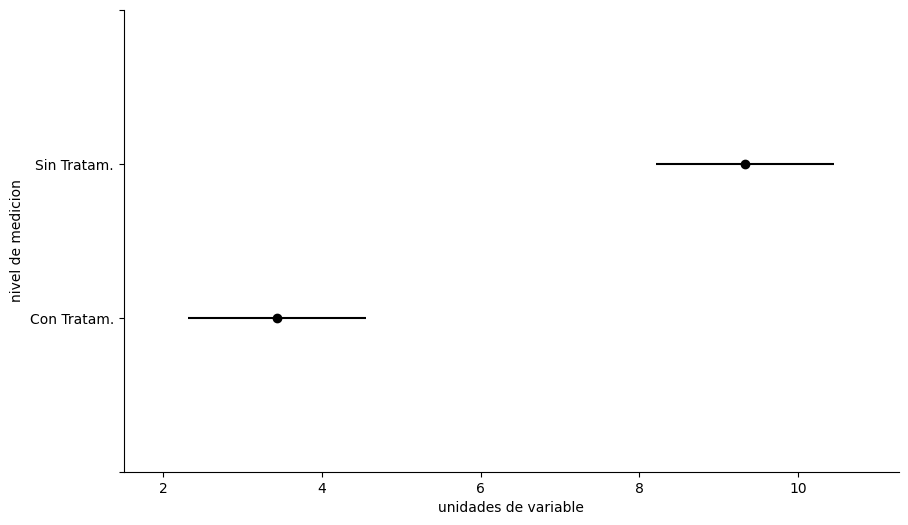

In [135]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'
nivel_significanica = 0.05

tukey = pairwise_tukeyhsd(endog=df['Porcentaje'], groups=df['Tratamiento'],
                          alpha=0.05)
tukey.plot_simultaneous(ylabel='nivel de medicion', xlabel = 'unidades de variable' )

plt.gca().spines[['right']].set_visible(False)
plt.gca().spines[['top']].set_visible(False)
plt.title('')
# Yessenia Guadalupe Alvarez Morales

Los niveles de medición 1 y 2 tienen valores promedio bajos y cercanos. El nivel 3 muestra un valor promedio mayor, y el nivel 4 presenta el valor promedio más alto.

Las barras de error sugieren posibles diferencias significativas entre algunos de estos niveles.